<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


Matplotlib is building the font cache; this may take a moment.


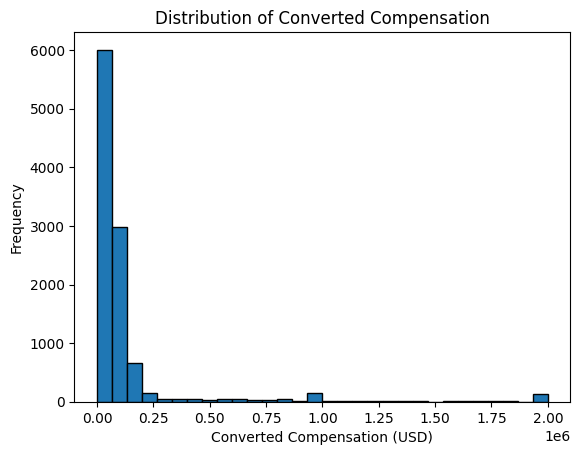

In [4]:
# your code goes here
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df and you want to plot the distribution curve for 'ConvertedComp'
data = df['ConvertedComp'].dropna()  # Remove any missing values

# Create a histogram with a specified number of bins
plt.hist(data, bins=30, edgecolor='k')

# Set plot labels and title
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')

# Show the plot
plt.show()


Plot the histogram for the column `ConvertedComp`.


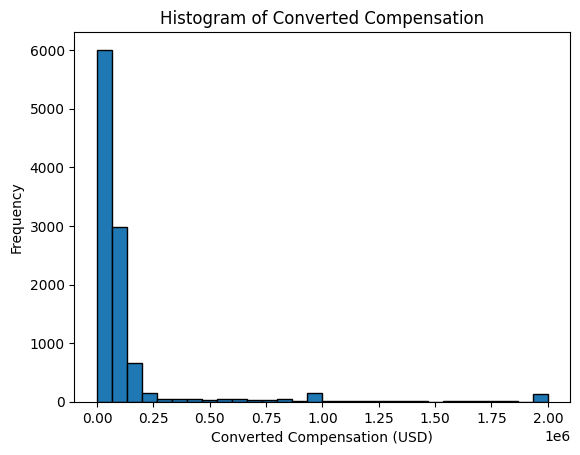

In [5]:
# your code goes here
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df and you want to plot the histogram for 'ConvertedComp'
data = df['ConvertedComp'].dropna()  # Remove any missing values

# Create a histogram with a specified number of bins
plt.hist(data, bins=30, edgecolor='k')

# Set plot labels and title
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')

# Show the plot
plt.show()


What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
median_compensation = df['ConvertedComp'].median()
print("Median Converted Compensation:", median_compensation)


Median Converted Compensation: 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
male_responders = df[(df['Gender'] == 'Man') & (df['Gender'].notna())]
count_male_responders = len(male_responders)

print("Number of responders who identified as Man:", count_male_responders)


Number of responders who identified as Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
female_responders = df[(df['Gender'] == 'Woman') & (df['Gender'].notna())]
median_female_comp = female_responders['ConvertedComp'].median()

print("Median ConvertedComp for responders who identified as Woman:", median_female_comp)


Median ConvertedComp for responders who identified as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
five_num_summary = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])

print(five_num_summary)

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


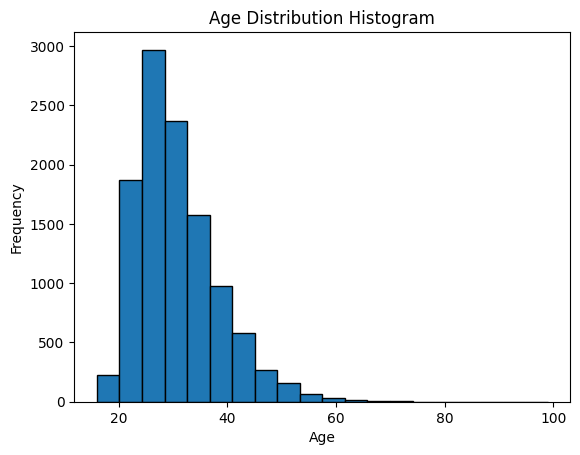

In [10]:
# your code goes here
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.hist(df['Age'], bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


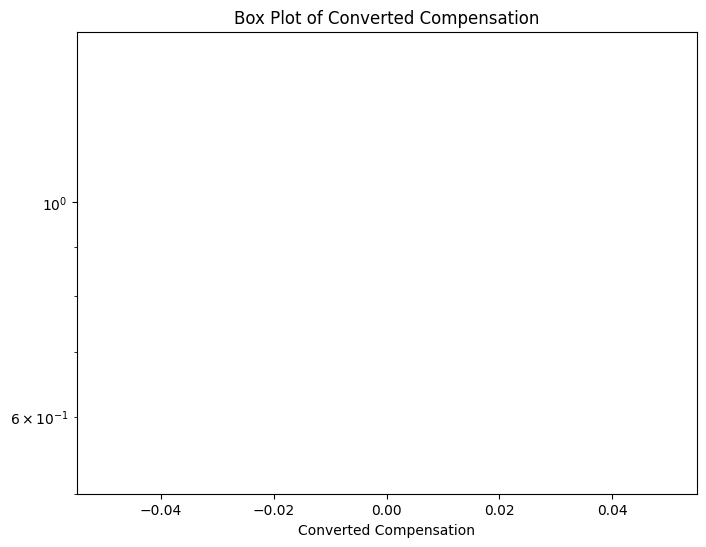

In [13]:
# your code goes here


# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(df['ConvertedComp'], vert=False)
plt.xlabel('Converted Compensation')
plt.title('Box Plot of Converted Compensation')
plt.yscale('log')  # Use log-scale for the y-axis
plt.show()



Find out the Inter Quartile Range for the column `ConvertedComp`.


In [14]:
# your code goes here
import numpy as np
import pandas as pd

# Assuming you have loaded your data into a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame if needed

# Calculate Q1 (25th percentile)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate Q3 (75th percentile)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)


Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [15]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR

# Calculate Upper Bound
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [16]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of Outliers in ConvertedComp:", num_outliers)

Number of Outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [17]:
# your code goes here
# Remove outliers from the DataFrame
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Now df_no_outliers contains only the rows without outliers in the ConvertedComp column


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [20]:
# your code goes here
numeric_columns = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_columns.corr()  # Compute the correlation matrix
age_correlation = correlation_matrix['Age'].drop('Age')  # Drop the Age column itself from the correlation matrix

# Now, age_correlation contains the correlation values between Age and all other numeric columns
print(age_correlation)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
